# 統計学入門編 (機械学習)
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 208 kB/s  eta 0:00:01
     |████████████████████████████████| 2.2 MB 9.5 MB/s eta 0:00:01


In [3]:
!pip list

Package             Version
------------------- ---------
appnope             0.1.0
argon2-cffi         20.1.0
asgiref             3.2.10
async-generator     1.10
attrs               20.2.0
backcall            0.2.0
bleach              3.2.1
certifi             2020.6.20
cffi                1.14.3
chardet             3.0.4
colorama            0.4.4
cycler              0.10.0
decorator           4.4.2
defusedxml          0.6.0
Django              3.1.1
entrypoints         0.3
gitdb               4.0.5
GitPython           3.1.11
idna                2.10
ipykernel           5.3.4
ipython             7.19.0
ipython-genutils    0.2.0
jedi                0.17.2
Jinja2              2.11.2
json5               0.9.5
jsonschema          3.2.0
jupyter-client      6.1.7
jupyter-core        4.6.3
jupyterlab          2.2.9
jupyterlab-git      0.23.1
jupyterlab-pygments 0.1.2
jupyterlab-server   1.2.0
kiwisolver          1.3.1
MarkupSafe          1.1.1
matplotlib          3.3.3
mistune             0.

## 📊 ドットプロット/ヒストグラム
---
+ **度数分布表**とはデータを階級に分け、各階級ごとの度数を表現した表
+ **ドットプロット**とは各変数ごとにデータの値をドット（点）で表現したグラフ
+ **ヒストグラム**とは度数分布表をグラフにしたもの

In [ ]:
# 使用するライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 練習問題「ゴルフのスコア」データ作成
golf = np.array([110,107,121,137,87,92,104,129,98,99,139,82,105,100,114,122,109,94,106,111])

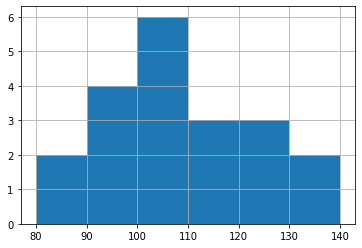

In [6]:
#ヒストグラムの作成
plt.hist(golf, range=[80,140], bins=6)
plt.grid(True)
plt.show()

## 📊 平均値　中央値　最頻値
---
### データの中央を表す指標
+ 平均値(mean value/ミーン)
> 観測値の総和を観測値の個数で割ったもの
> アベレージとも呼ばれるが統計ではMeanと呼ぶことが一般
>> Mean = (7+12+3+19+5+10+7)/7 ≒ ９
+ 中央値(median value/メディアン)
> 有限個のデータを小さい順（or大きい順）に並べた時中央に位置する値
>> Median = 3,5,7,7,10,12,19 = 7
>> Median = 2,3,5,7,7,10,12,19 = 6.5
+ 最頻値(mode/モード)
> データ群や確率分布で最も頻繁に出現する値（があれば）
>> Mode = 7
### データの分布（散らばり度）を表す指標
+ 四分位範囲（Interquartile range： IQR）
> 
>> IQR = 後半Median - 前半Median 

四分位範囲の求め方は「中央値」の扱い方が異なる3つの求め方があります。
Numpyの```np.percentile()```などを利用してIQRを求める際には、中央値の扱い方に注目をして、どの方法でIQRが算出されているかに注意をしましょう。
算出方法が異なると IQRの値も異なります。

In [18]:
# 使用するライブラリのインポート
import numpy as np
# 練習問題「1日のコーヒーの量」データ作成
coffee = np.array([2,2,3,5,7,9,10,15,16])

In [19]:
#中央値(Median)
coffee_median = np.median(coffee)
coffee_median

7.0

In [20]:
# 「coffee」のデータから中央値を除いて前半(Q1)と後半(Q3）に分ける
coffee_q1 = np.array([2,2,3,5])
coffee_q3 = np.array([9,10,15,16])

# Q1とQ3の中央値(Median)を求めよう
q1_median = np.median(coffee_q1)
q3_median = np.median(coffee_q3)

# IQRを算出（四分位範囲＝後半中央値ー前半中央値）
IQR = q3_median - q1_median

# 答え確認
print('中央値 = ', coffee_median)
print('IQR = ', IQR)

中央値 =  7.0
IQR =  10.0


## 📊 分散　標準偏差
---
### 概念
+ 「母集団(Population)」 : 何か情報を得たいと考えている全てのデータ
+ 「標本(Sample)」 : 母集団から一部抜粋したデータ

<img src='http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2016/08/2b530e80c7d0de90885e285c5d798063-12.png' width=50%>

### 散らばり度を計る指標
+ 「分散(Variance)」 
+ 「標準偏差(Standard Deviation)

<img src='http://whitewell.sakura.ne.jp/R/Figs/RS-3-1.png' width=80%>

---

    e.g. 部内の全メンバー（５名）の野球経験年数
       1, 2, 2 ,5, 6年

+ 母平均（Population Mean）
> μ（ミュー）＝母平均　統計ではしばしばこう呼ばれる
>
> → (1+2+2+5+6)/5 = 3.2
> 
> ![img]()

+ 母分散（Population Variance）
> σ（シグマ）＝母分散： 平均から各データーポイントがどれくらい離れているか
>
> (1-3.2)^2+(2-3.2)^2+(2-3.2)^2+(5-3.2)^2+(6-3.2)^2/5 = 3.76
> 各データからμを引いて、２乗する（∵マイナスの値にしない趣旨）
>
> ![img](https://weblio.hs.llnwd.net/e7/img/dict/tkgyg/TokeigakuNote/Average/bun-eq6.png)

In [1]:
import numpy as np

In [2]:
# 平均値を求める関数
def find_mean(data):
    s = sum(data)
    n = len(data)
    mean = s / n
    return mean

In [3]:
a = [1, 2, 2, 5, 6]

In [4]:
find_mean(a)

3.2

In [8]:
# 偏差を求める関数
def find_diff(data):
    mean = find_mean(data)
    diff = []
    for num in data:
        diff.append(num - mean)
    return diff

In [9]:
find_diff(a)

[-2.2, -1.2000000000000002, -1.2000000000000002, 1.7999999999999998, 2.8]

In [12]:
# 分散を求める関数
def find_variance(data):
    diff = find_diff(data)
    sq_diff = []
    for d in diff:
        sq_diff.append(d**2)
    sum_sq_diff = sum(sq_diff)
    variance = sum_sq_diff/len(data)
    return variance

In [16]:
find_variance(a)

3.7600000000000002

### 標準偏差（Standard Deviation）
    e.g. チーム内の全メンバーの身長（m）
       1.6, 1.9, 1.5, 1.8, 1.7

1. 母平均
> μ = (1.6+1.9+1.5+1.8+1.7)/5 = 1.7メートル


2. 母分散
>σ^2 = {(1.6-1.7)^2+(1.9-1.7)^2+(1.5-1.7)^2+(1.8-1.7)^2+(1.7-1.7)^2}/5 = 0.02平方メートル

※メートル計算だが、２乗したことにより平方メートルに変化！
平方メートルをメートルに直すために
> 母分散σ^2の平方根σ
> 
> σ^2 = 0.02㎡
>
> σ   = 0.14m　（```母集団標準偏差：Population Standard Deviation```）

In [21]:
d = np.array([1.6, 1.9, 1.5, 1.8, 1.7])

In [23]:
# 母分散（σ^2）
variance = find_variance(d)
variance

0.019999999999999993

In [24]:
# 標準偏差（σ）：　母分散の平方根
np.sqrt(variance)

0.14142135623730948

## 📊 標本標準偏差
---
+ 「標本分散 (Sample Variance)」
>
+ 「不偏分散 (Unbiased Variance)」
> 標本が母集団を求めるのに適している数か判断する（「母集団割り出すのに標本足りてる〜？」）
+ 「標本標準偏差 (Sample Standard Deviation)」

<img src='https://blog.apar.jp/wp-content/uploads/2016/05/population-sample-02-1.png' width=50%>
src:[５分で分かる！「母集団」と「標本」の意味](https://blog.apar.jp/data-analysis/4607/)

---
e.g. 日本全人口の身長のデータ＝母集団（Population）🗾

    (but) 同時刻の全ての日本人の等制約を儲けるとデータ取得が困難

    そこで、標本（Sample）=6名を用いる
        1.5, 1.7, 1.8, 1.6, 1.5, 1.7
    
    x   : 標本平均（Sample Mean）=1.63
    s^2 : 標本分散（Sample Variance）=0.0122
    u^2 : 不偏分散（Unbiased Sample Variance）＝0.0146
    

In [29]:
import numpy as np

In [24]:
# 平均
def find_mean(data):
    s = sum(data)
    n = len(data)
    mean = s/n
    return mean

# 偏差
def find_diff(data):
    mean = find_mean(data)
    diff = []
    for num in data:
        diff.append(num - mean)
    return diff

# 分散
def cal_variance(data):
    diff = find_diff(data)
    sq_diff = []
    for d in diff:
        sq_diff.append(d**2)
    sum_sq_diff = sum(sq_diff)
    variance = sum_sq_diff/len(data)
    return variance

In [25]:
sample = np.array([1.5, 1.7, 1.8, 1.6, 1.5, 1.7])

In [26]:
find_mean(sample)

1.633333333333333

In [27]:
sample.mean()

1.633333333333333

In [28]:
cal_variance(sample)

0.012222222222222223

In [30]:
# 不偏分散
def cal_unbaiased_variance(data):
    diff = find_diff(data)
    sq_diff = []
    for d in diff:
        sq_diff.append(d**2)
    sum_sq_diff = sum(sq_diff)
    unbaiased_variance = sum_sq_diff/(len(data)-1)
    return unbaiased_variance

In [31]:
cal_unbaiased_variance(sample)

0.014666666666666666

e.g. 🍀クローバー畑の四葉のクローバー数から標本標準偏差を求めよ

<img src='https://nerima-kodomonomori.com/wpf/wp-content/uploads/2015/04/a0800_001212-332x221.jpg' width='20%'>

    ランダムに標本を８箇所選択：以下其々８箇所の中に在🍀の数
    2, 1, 3, 6, 1, 2, 4, 5 (本)
    
    ・ 標本平均（SampleMean）
      x＝ （2+1+3+6+1+2+4+5） ÷ ８ ＝ 3.0
     
    ・ 不偏分散(Unbaiased Samole Variance)
      u^2 = {(2-3)^2+(1-3)^2+(3-3)^2+(6-3)^2+(1-3)^2+(2-3)^2+(4-3)^2+(5-3)^2+}÷（８−１）
      ≒ 3.429
      
    ・ 標本標準偏差（Sample Standard Deviation）
      > 不偏分散を平方根（√）した値
      u = √u^2
        = 1.852
        
     　よって、母集団（Population）の標準偏差（Standard Deviation）の不偏推定量
      > (咀嚼) 本当はクローバー畑全体（母集団）の標準偏差を求めたい！
      > だけど、あまりに広大のため、ランダムに選択した箇所（標本）の標準偏差を求めて、
      > 母集団の標準偏差を推測（不偏推定量）してみました。って感じ。

In [32]:
clover = np.array([2, 1, 3, 6, 1, 2, 4, 5])

In [33]:
find_mean(clover)

3.0

In [35]:
clover_un_vr = cal_unbaiased_variance(clover)
clover_un_vr

3.4285714285714284

In [36]:
np.sqrt(clover_un_vr)

1.8516401995451028

### 📊 外れ値　平均値/中央値
---

    e.g.🍻半年の飲み会の数(15名の其々の回数)
        1,1,6,10,10,12,12,13,13,13,15,15,16,16,17 （回）
        
        １を外れ値として除外しても良い？　→　結論：良い

---

+ 外れ値（Outliers）
> データ群より明らかに離れたデータ（例題の場合、１とか）を推定する際に加味するべきか否かの考え方

    一般的な外れ値の求め方
    ```(Q3+1.5*IQR) < 外れ値 < (Q1-1.5*IQR)```
    
    22.5　<　外れ値　< 2.5

 + 中央値（Median）＝１３
 + IQR（四分位範囲）= Q3-Q1 =5
   + Q1（第１四分位点）=10　：中央値の値の前半部分の更に中央値
   + Q3（第３四分位点）=1５

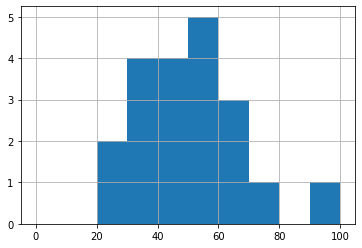

In [51]:
# exam1
import numpy as np
import matplotlib.pyplot as plt

age = np.array([36, 25, 38,	46,	55,	68,	72,	55,	36,	38, 67,	45,	22,	48,	91,	46,	52,	61,	58,	55])

plt.hist(age, range=[0, 100], bins=10)
plt.grid(True)
plt.show()

In [65]:
# exam2
import numpy as np
import matplotlib.pyplot as plt
import statistics

math_point = np.array([80, 78, 91, 84, 76, 68, 89, 85, 91, 83])

median = np.median(math_point)
mean = math_point.mean()
mode = statistics.mode(math_point)

print('Median ＝ ', median, sep='')
print('Mean ＝ ', mean, sep='')
print('Mode ＝ ', mode, sep='')

Median ＝ 83.5
Mean ＝ 82.5
Mode ＝ 91


In [64]:
!python --version

Python 3.8.5


In [70]:
# exam3
import numpy as np

population = 2250
population_mean = 78.2
population_variance = 27.5625

sq_pppulation_variance = np.sqrt(population_variance)
print('σ ＝ ', sq_pppulation_variance, '(母集団標準偏差)',sep='')

σ ＝ 5.25(母集団標準偏差)


In [74]:
# exam4
import numpy as np

population = 920
sample_child = np.array([2, 2, 5, 7])

# diff
def find_diff(data):
    diff = []
    mean = data.mean()
    for d in data:
        diff.append(d-mean)
    return diff

# unbaiased variancce
def cal_uinbaiased_variance(data):
    sq_dif = []
    diff = find_diff(data)
    for d in diff:
        sq_diff.append(d**2)
    sum_sq_diff = sum(sq_diff)
    unbaiased_variance = sum_sq_diff/(len(data)-1)
    return variance

res = cal_unbaiased_variance(sample_child)
print('σ^2 = ', res)
print('σ = ', np.sqrt(res))

σ^2 =  6.0
σ =  2.449489742783178


### 📊 Zスコア
> 機会学習分野では頻出割合は低いが概念を押さえておこう！
---
+ Zスコアとは、平均から標準偏差何個ぶん離れているかを表している
+ ```Zスコアの求め方 = (データ - 平均) ÷ (標準偏差)```

<img src='https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill%28auto,1%29/zscore-56a8fa785f9b58b7d0f6e87b.GIF' width=25%>


e.g) 学校の期末テストの点数は正規分布に従っており、平均μ=76、標準偏差σ=7.2でした。いずれのZスコアを求めよ。
> 1. 52点
> 2. ７４点
> 3. ９８点

※ 正規分布

<img src='https://media-kojirokousi.com/wp-content/uploads/2017/12/9ce101d0a1ce0310f592b172635a6b8d.png' width=25%>

> 平均部分が山頂

1. (52-76)/7.2 = -3.33 : 平均からマイナス方向に3つ離れているところに属していると言える。
2. (74-76)/7.2 = -0.28 
3. (98-76)/7.2 = 3.06 

---
e.g) 📄物理と数学のテストの結果（とある学校の）

    物理 平均(μ)=87点　標準偏差(σ)=6.4点
    数学 平均(μ)=74点　標準偏差(σ)=3.2点
    
A君は、物理９２点　数学８２点　どちらの科目が比較的に良い結果だったか？
> 一見、物理の方が得点が高いので物理の方が良いと思う...

[zスコア]

    物理　(92-87)/6.4 = 0.78　:平均から0.78個離れている
    数学　(82-74)/3.2 = 2.5 　:平均から２.５個離れている
    →　Zスコアの比較から数学の方が良い結果と言える。

### 📊 密度曲線 （ Density Curve:デンシティ・カーブ ）
---

+ 連続する確率分布をグラフ化したものを密度曲線
+ XとYの値が重要ではなく密度曲線内の面積に意味があります
+ 密度曲線内の面積を和は「1」（つまり100%）

データの分布が可視化されている
密度曲線はマイナスの値を持ちません

見方として、「４杯以下のデータは何％？」
おおよその面積を見て見る。

---
e.g) ☕️ 1日に飲むコーヒーの量（杯）

    0.4,0.8,1.2,2.2,2.3,2.3,3.0,3.0,3.0,3.1,3.3,3.5,3.8,4.1,4.8,4.9,5.1,5.7,6.9,7.1

In [75]:
import numpy as np
import matplotlib.pyplot as plt

coffee = np.array([0.4,0.8,1.2,2.2,2.3,2.3,3.0,3.0,3.0,3.1,3.3,3.5,3.8,4.1,4.8,4.9,5.1,5.7,6.9,7.1])

In [77]:
# データ個数
coffee.size

20

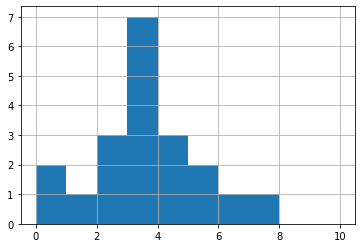

In [81]:
# ヒストグラム
plt.hist(coffee, range=[0, 10])
plt.grid(True)
plt.show()

(array([10.,  5., 15., 35., 15., 10.,  5.,  5.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

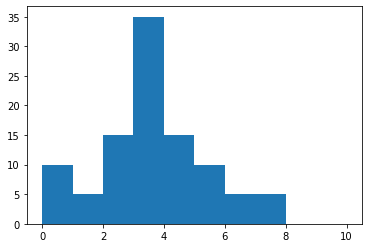

In [99]:
# 相対度数のヒストグラム （weightsアーギュメントを用いる！）
#```weights= 1/20 * 100 ``` ☕️一杯当たりの重みを％で計算
plt.hist(coffee, weights=np.zeros_like(coffee)+1/coffee.size*100, range=[0, 10]) #bins：階級も指定できる

In [89]:
# 乱数を用いて１０００個のデータを作成
# ```np.random.正規分布（平均, 標準偏差, 個数）```
coffee_2 = np.random.normal(5.0, 1.0, 1000)

In [90]:
coffee_2.mean()    # 平均(μ:mean）　おおよそ５.０付近となる

5.011427453849927

In [91]:
coffee_2.std()    # 標準偏差（σ：standard deviation）　おおよそ１．０付近となる

0.9992340564935444

In [93]:
coffee_2.size    # 個数

1000

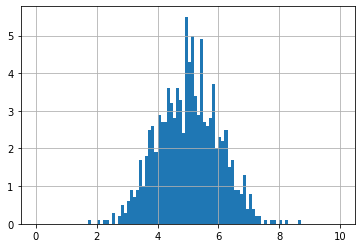

In [98]:
plt.hist(coffee_2, weights=np.zeros_like(coffee_2)+1/coffee_2.size*100, range=[0, 10], bins=100)   # 相対度数
plt.grid(True)

In [100]:
# 密度曲線を描画
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [101]:
!pip install pandas

     |████████████████████████████████| 10.1 MB 6.0 MB/s eta 0:00:01


In [102]:
import pandas as pd

ModuleNotFoundError: No module named 'scipy'

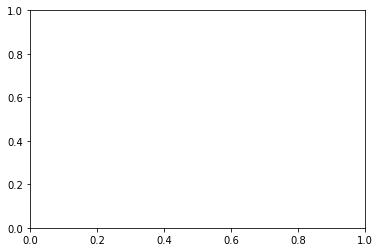

In [103]:
pd.DataFrame(coffee_2).plot(kind='density')

In [104]:
!pip install scipy

     |████████████████████████████████| 29.0 MB 138 kB/s eta 0:00:011


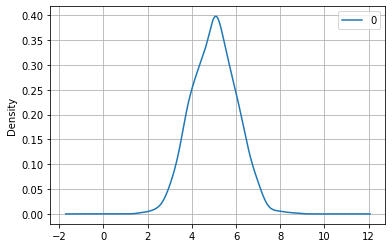

In [107]:
pd.DataFrame(coffee_2).plot(kind='density')
plt.grid(True)

### 📊 正規分布(Normal Distribution:ノーマル・ディストリビューション）
> 機会学習では頻繁には出てこない
---

<img src='https://media-kojirokousi.com/wp-content/uploads/2017/12/9ce101d0a1ce0310f592b172635a6b8d.png' width=45%>

+ 平均(Mean)付近が一番高く左右対称の釣り鐘型の分布
+ 「68％-95％-99.7％ルール」と標準偏差を用いて確率を導き出せます
> 正規分布の密度教区線内の面積を１００％とした時

　　    Zスコア１ の内側の割合 : 68%
   　　 Zスコア2 の内側の割合 : 95%
       Zスコア3 の内側の割合 : 99.7%
    

+ ZスコアとZテーブルでも確率も導き出すことが可能

---

    e.g. Z市の20歳男性の身長データを取ったところ、正規分布に従っており、平均が１７６㌢で標準偏差が5.1㌢だった
         （解法ヒント）密度曲線を描いて用いてみよう！
         
         a) 170.9cm以下の割合は？ 
         （解法ヒント） 「68-95-99.7ルール」 を用いYO!
         
         （１００％-68%）÷２ ＝ １６％
         
         b) 165.8cm~186.2cmの割合は？
         
         ９５％
         
         c) 1９１.３cm以上の割合は？
         
         （１００%-99.7%）÷２ = 0.15%
         
         d) A君178.6cm、A君より身長が低い人の割合は？
         ※「68-95-99.7ルール」が使えない💦
         （解法ヒント）　Zテーブル：標準正規分布表 を用いYO!
         
         A君のZスコア：　（178.6ー１７６）÷５.１ = 0.51    # 標準偏差から０.51個離れたところに分布する
         
         Zテーブル：　0.51 = 0.6950 →　69.5%
         
<img src='https://toukeigaku-jouhou.info/wp-content/uploads/2015/08/hyoujyunseikibunpuhyou1.png' width=35%>

>x軸：少数点第二位
>y軸：少数点第一位   

### 📊 散布図（Scatter plot）　相関関係
---

    相関関係とは2つの変数において、一方が変換すれば他方も変換する関係を相関関係と呼びます。
    相関関係には「正」と「負」、「強い」と「弱い」といった相関関係があります。
    「正の相関関係」は一方の変数が増えた時、他方の変数も増える関係性を呼びます。
    「負の相関関係」は逆に一方の変数が増えた時に、他方が減る関係性です。


e.g, 期末テストの結果と勉強時間

|出席番号|１|２|3|4|5|6|7|8|9|10|11|12|13|14|
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|時間|0.5|6|2|1.5|4|2.5|3|1|5|5.5|3.5|4.5|3.5|3|
|点数|69|97|83|76|92|83|76|92|86|87|74|93|93|88|89|84|79|


勉強時間が多いほど、得点にも良い影響を与えている。正の相関関係があると言える。


<img src='https://www.toukei.metro.tokyo.lg.jp/manabou/img/tyuu/sirou/tokutyou/b-2.gif' width=90%>

### 📊 相関係数（correlation coefficient）
---

+ 相関係数は英語でcorrelation coefficient（コリレーション・コエフィシェント）
+ 一般的に英語記号で「r」（アール）と表記されます
+ 相関係数は```-1 <= r <= 1```の値を持ちます
> xとyの値に対して直線がどれくらい綺麗に引けるかを表している。

> ※相関係数は「０」が一番弱い！＝相関関係が全くないと言える

<img src='https://atarimae.biz/wp-content/uploads/2050/10/correl-equation.png' width=35%>

<img src='https://atarimae.biz/wp-content/uploads/2050/10/soukan.png' width=50%>


e.g. 

     (x,y)
    =(1,1)
    =(3,2)
    =(4,5)
    =(6,8)

    x_mean = 3.5
    x_std  = 1.803 ... Sx
    
    y_mean = 4
    y_std  = 2.739 ... Sy
    
    Sxy    = 4.75
    
    r      = 4.75 / 1.803*2.739
           = 0.962 ... 相関係数



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,3,4,6])
y = np.array([1,2,5,8])

In [3]:
sx = x.std()
sy = y.std()

In [4]:
sx

1.8027756377319946

In [5]:
sy

2.7386127875258306

In [7]:
# 共分散（Covariance）
sxy = np.cov(x, y, ddof=0)[0][1]

In [8]:
sxy

4.75

In [11]:
r = sxy/(sx*sy)

In [12]:
r

0.9621023987294833

### 📊 線形回帰(Linear Regression)
---

線形モデルを導き出す。

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png'>

e.g.

期末テストの結果kと勉強時間

|出席番号|１|２|3|4|5|6|7|8|9|10|11|12|13|14|
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|時間|0.5|6|2|1.5|4|2.5|3|1|5|5.5|3.5|4.5|3.5|3|
|点数|69|97|83|76|92|83|76|92|86|87|74|93|93|88|89|84|79|

a) 勉強時間4時間の生徒の点数を推測？
> 表からは4時間勉強した人の得点は９２点、しかし誰しも4時間勉強したらそれを上回るのか下回るのか？いい分を推測しよう！

データの傾向的に、一般の方が4時間勉強したら、８９点(線形モデルからの推測) と推測できる。
> 散布図を作成して、いい分の線を引いた場合

b）　この線形モデルを最適に表す数式は？

    1) y = 6x +67.2
    2) y = -5x +67.2
    3) y = 5.3x +67.2　◎
    
    傾き計算 ： y軸/x軸 = 8 ÷　1.5 = 5.3333...


c) 2時間勉強した生徒の推測点数は？

    y = 5.3x + 67.2
      = (5.3*2) + 67.2
      = 77.8 点

### 📊 残差(Residua) 最小二乗法（LSM:Least Squares Method）
> 2つのデータにフィットする直線（線形モデル）の導き出し方
---

+ 残差は英語で「Residual」（レジヂュアル）
+ 実際のデータと線形モデルで推測した値との差が残差
 + 実データが予測値よりも低い場合は残差がマイナス
 + 実データが予測値よりも高い場合は残差がプラス
 > 残差を計算することで、線形モデルの予測の精度の良し悪しが解る


+ 線形モデル（データに最もフィットする直線）を求める方法は2つ
 + ①残差の```絶対値```の合計が最小になる
 + ②残差の```二乗```の合計が最小になる

+ 2つ目の残差の二乗の最小値を用いて線形モデルを導き出す方法が「最小二乗法」
+ 「最小二乗法」は英語でLeast Squares Method（LSM）

---

e.g. 身長と体重の散布図（スキャタープロット：図１）
> 正の相関関係

    線形モデル（線を引く）を作成して予測する!
    ますは、最適なモデルを導き出す！（全てのポイントちょうど真ん中ぐらいでいい分な線）

![img](http://fk-plaza.jp/Solution/QC7/img/qc7-4-1.gif)

数式　：　y^ = wx + b
> y^ （yハット）：予測、導き出したい数字の意

In [16]:
# exam
mean = 83
std = 3.0
A_score = 92

z = (A_score-mean)/std
print('A君のZスコアは、',z)

A君のZスコアは、 3.0


In [24]:
a = 22.4
y = (0.41*a)-.55
y

8.633999999999999